In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
### Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
dataset = pd.read_csv('datasets_228_482_diabetes.csv', header = 0)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

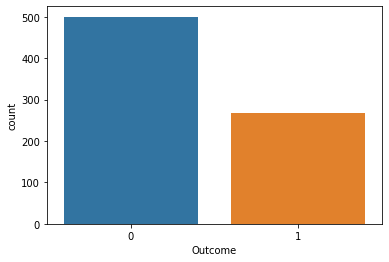

In [17]:
sns.countplot(x='Outcome', data=dataset)


In [12]:
dataset.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


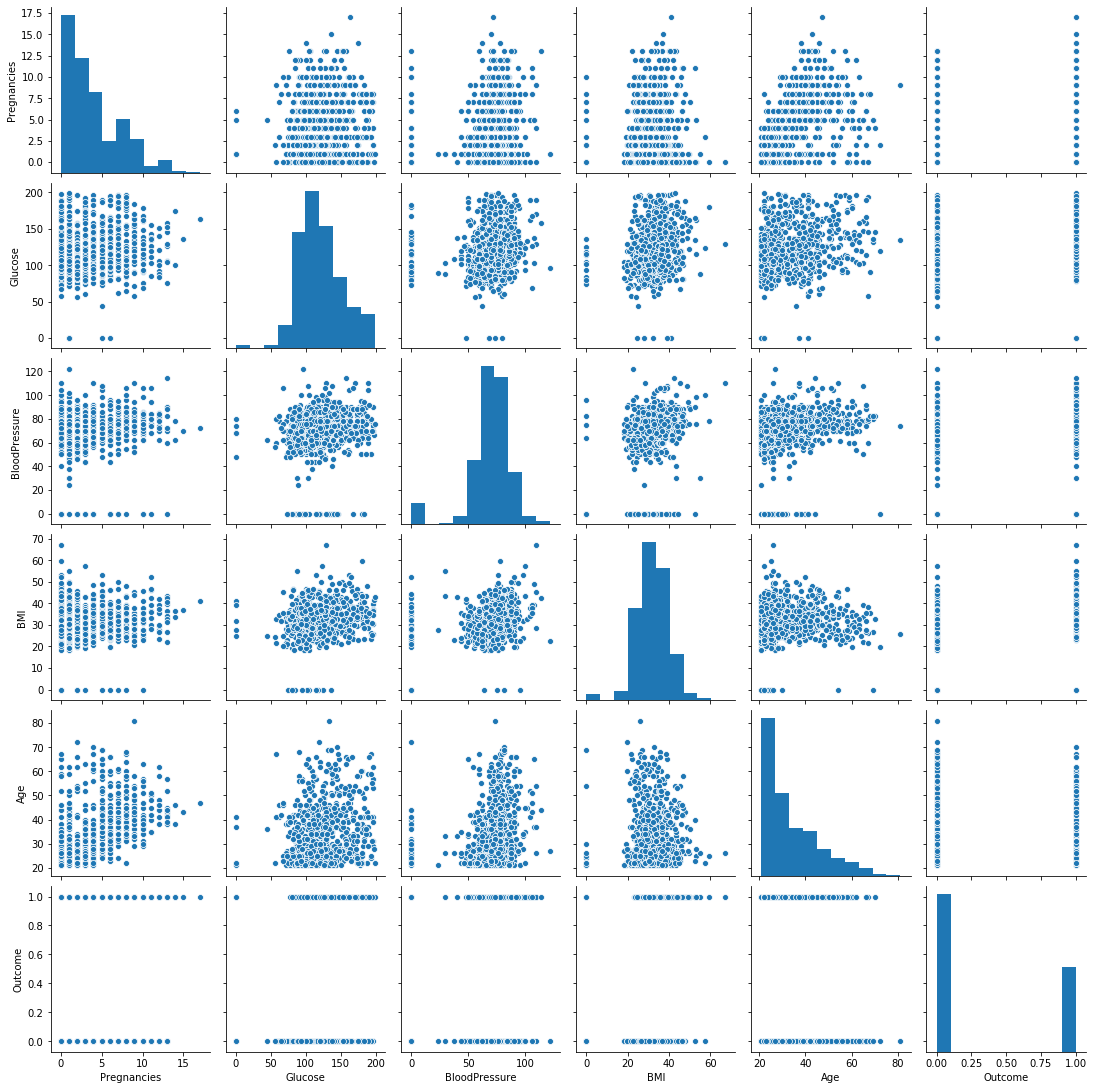

In [37]:
sns.pairplot(dataset)

In [13]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
## get the average of all categories to see a trend
dataset.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
dataset.groupby(['Glucose']).mean()
### This will be helpful for categorical features to get a better understanding of our data

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,,,,,,,,
0,2.800000,67.600000,29.600000,4.600000,32.880000,0.380200,28.600000,0.40
44,5.000000,62.000000,0.000000,0.000000,25.000000,0.587000,36.000000,0.00
56,2.000000,56.000000,28.000000,45.000000,24.200000,0.332000,22.000000,0.00
57,4.500000,70.000000,18.500000,0.000000,27.250000,0.415500,54.000000,0.00
61,3.000000,82.000000,28.000000,0.000000,34.400000,0.243000,46.000000,0.00
...,...,...,...,...,...,...,...,...
195,6.500000,70.000000,16.500000,72.500000,28.000000,0.245500,43.000000,1.00
196,5.333333,80.666667,21.666667,176.333333,37.933333,0.643667,42.333333,1.00
197,4.000000,71.000000,45.750000,321.750000,31.950000,1.063250,46.250000,0.75


In [29]:
dataset.groupby(['BloodPressure']).mean()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
BloodPressure,,,,,,,,
0,3.628571,117.800000,1.514286,0.000000,25.705714,0.388429,30.714286,0.457143
24,1.000000,89.000000,19.000000,25.000000,27.800000,0.559000,21.000000,0.000000
30,1.000000,95.500000,40.000000,91.000000,49.150000,0.339500,29.500000,0.500000
38,1.000000,109.000000,18.000000,120.000000,23.100000,0.407000,26.000000,0.000000
40,0.000000,137.000000,35.000000,168.000000,43.100000,2.288000,33.000000,1.000000
44,3.250000,110.500000,25.000000,71.750000,28.175000,0.408250,27.000000,0.000000
46,1.500000,133.000000,20.000000,209.000000,31.550000,0.415000,22.000000,0.000000
48,2.000000,80.000000,23.000000,87.000000,32.280000,0.450000,23.800000,0.200000
50,2.461538,124.076923,22.000000,124.461538,28.846154,0.586385,29.000000,0.384615


In [30]:
dataset.groupby(['SkinThickness']).mean()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
SkinThickness,,,,,,,,
0,4.638767,123.449339,64.118943,0.000000,30.129956,0.393291,37.251101,0.387665
7,9.000000,110.500000,76.000000,292.000000,23.600000,0.754000,52.000000,0.500000
8,1.000000,99.500000,64.000000,91.000000,24.950000,1.042500,28.500000,0.000000
10,1.400000,93.400000,54.400000,79.800000,26.200000,0.515000,22.200000,0.000000
11,2.166667,98.333333,72.666667,69.166667,25.083333,0.430667,24.333333,0.000000
12,2.571429,109.000000,70.285714,79.285714,25.671429,0.464571,29.571429,0.142857
13,1.636364,109.363636,61.090909,97.636364,22.954545,0.366636,23.272727,0.090909
14,1.500000,135.666667,69.666667,176.500000,26.783333,0.428667,23.833333,0.333333
15,2.928571,118.642857,72.071429,78.785714,26.878571,0.432571,30.357143,0.071429


Text(0, 0.5, 'Outcome')

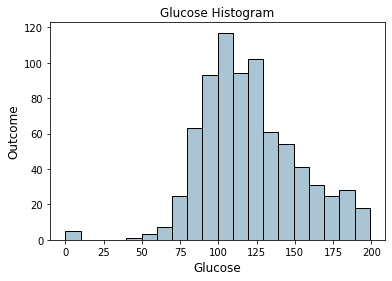

In [12]:
## Binning features
fig, ax = plt.subplots()
dataset['Glucose'].hist(bins=20, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Glucose Histogram', fontsize=12)
ax.set_xlabel('Glucose', fontsize=12)
ax.set_ylabel('Outcome', fontsize=12)


Text(0, 0.5, 'Outcome')

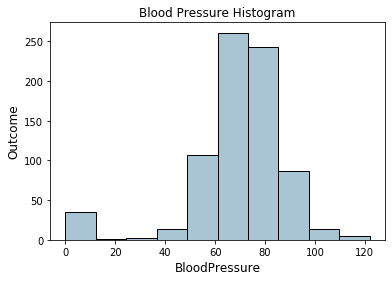

In [13]:
fig, ax = plt.subplots()
dataset['BloodPressure'].hist(bins=10, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Blood Pressure Histogram', fontsize=12)
ax.set_xlabel('BloodPressure', fontsize=12)
ax.set_ylabel('Outcome', fontsize=12)


Text(0, 0.5, 'Outcome')

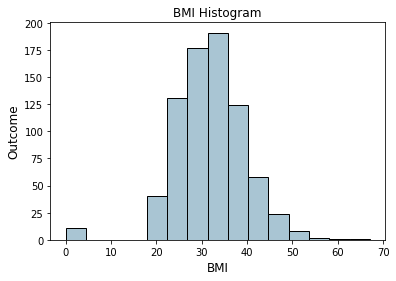

In [51]:
fig, ax = plt.subplots()
dataset['BMI'].hist(bins=15, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('BMI Histogram', fontsize=12)
ax.set_xlabel('BMI', fontsize=12)
ax.set_ylabel('Outcome', fontsize=12)


Text(0, 0.5, 'Outcome')

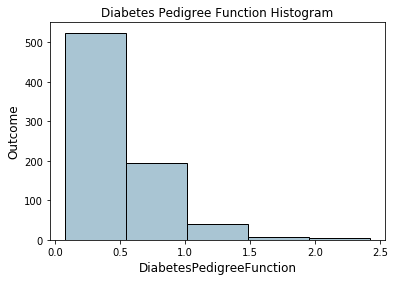

In [14]:
fig, ax = plt.subplots()
dataset['DiabetesPedigreeFunction'].hist(bins=5, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Diabetes Pedigree Function Histogram', fontsize=12)
ax.set_xlabel('DiabetesPedigreeFunction', fontsize=12)
ax.set_ylabel('Outcome', fontsize=12)


Text(0, 0.5, 'Outcome')

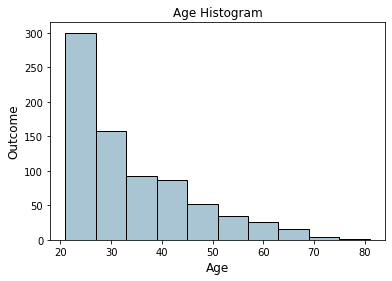

In [53]:
fig, ax = plt.subplots()
dataset['Age'].hist(bins=10, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Outcome', fontsize=12)


Text(0, 0.5, 'Outcome')

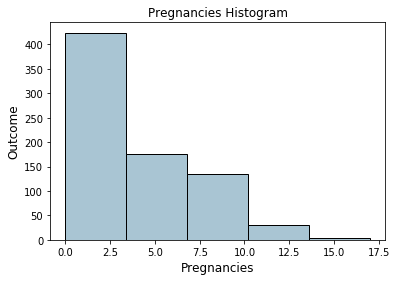

In [15]:
fig, ax = plt.subplots()
dataset['Pregnancies'].hist(bins=5, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Pregnancies Histogram', fontsize=12)
ax.set_xlabel('Pregnancies', fontsize=12)
ax.set_ylabel('Outcome', fontsize=12)


Text(0, 0.5, 'Outcome')

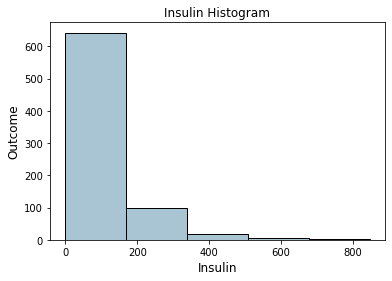

In [58]:
fig, ax = plt.subplots()
dataset['Insulin'].hist(bins=5, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Insulin Histogram', fontsize=12)
ax.set_xlabel('Insulin', fontsize=12)
ax.set_ylabel('Outcome', fontsize=12)


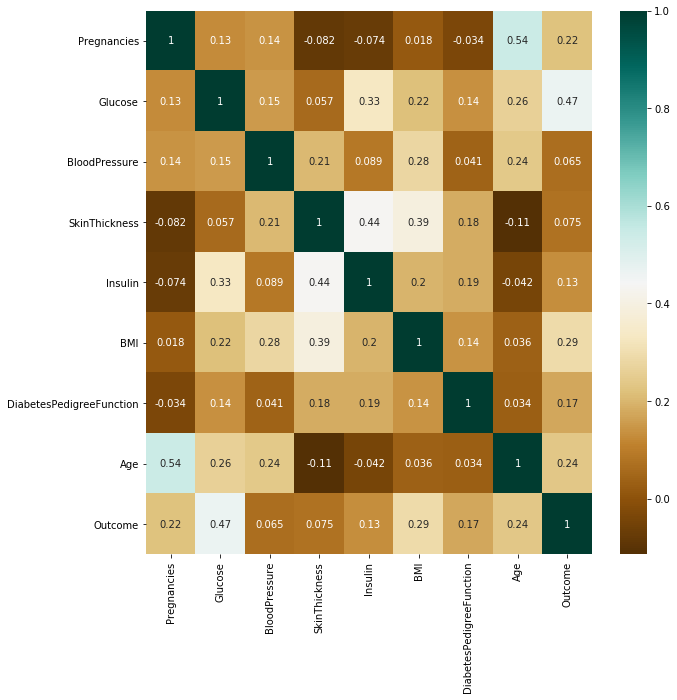

In [16]:
#### HeatMap for data visualization
C = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(C,cmap="BrBG",annot=True)

Text(0, 0.5, 'Outcome')

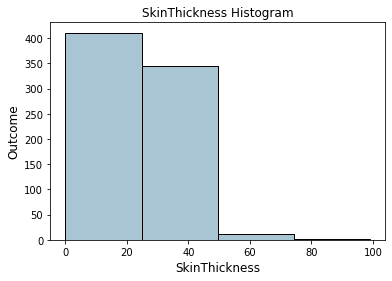

In [17]:
fig, ax = plt.subplots()
dataset['SkinThickness'].hist(bins=4, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('SkinThickness Histogram', fontsize=12)
ax.set_xlabel('SkinThickness', fontsize=12)
ax.set_ylabel('Outcome', fontsize=12)


In [2]:
dataset


NameError: name 'dataset' is not defined

In [26]:
dataset.drop(['Insulin'], axis = 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [27]:
dataset.drop(['DiabetesPedigreeFunction'], axis = 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [28]:
dataset.drop(['DiabetesPedigreeFunction'], axis = 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [18]:
dataset.drop(['DiabetesPedigreeFunction','Insulin','SkinThickness'], axis = 1,inplace= True)

In [19]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome'], dtype='object')

In [20]:
dataset

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,6,148,72,33.6,50,1
1,1,85,66,26.6,31,0
2,8,183,64,23.3,32,1
3,1,89,66,28.1,21,0
4,0,137,40,43.1,33,1
...,...,...,...,...,...,...
763,10,101,76,32.9,63,0
764,2,122,70,36.8,27,0
765,5,121,72,26.2,30,0
766,1,126,60,30.1,47,1


In [33]:
y_data = dataset['Outcome']
x_data = dataset.drop('Outcome', axis = 1)

from sklearn.model_selection import train_test_split

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)


In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [35]:
from sklearn.metrics import classification_report
classification_report(y_test_data, predictions)


'              precision    recall  f1-score   support\n\n           0       0.78      0.88      0.83       146\n           1       0.74      0.56      0.64        85\n\n    accuracy                           0.77       231\n   macro avg       0.76      0.72      0.73       231\nweighted avg       0.76      0.77      0.76       231\n'

In [32]:
## Generate a confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))


[[131  15]
 [ 35  50]]


In [ ]:
### Random Forest Classifier

In [63]:
import sys
!{sys.executable} -m pip install xgboost

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


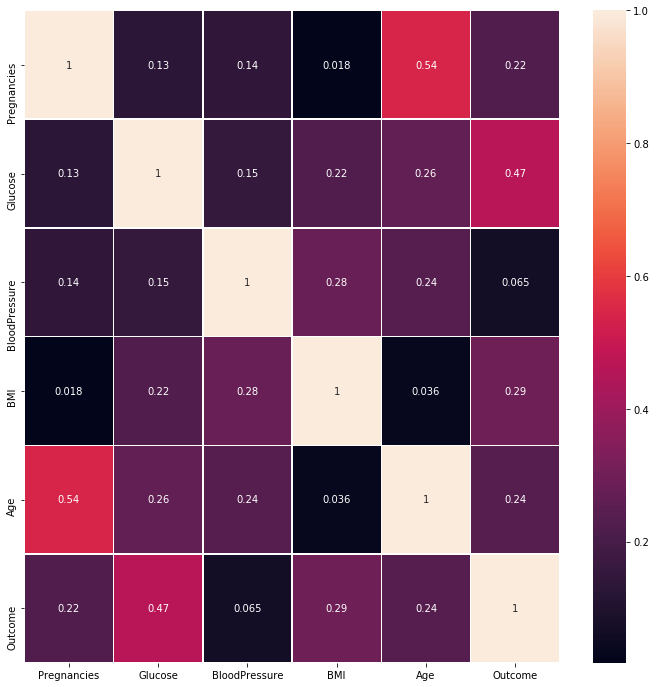

In [66]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True, linewidths=.5, ax=ax)
plt.show()

In [67]:
accuracy_list = []
algorithm = []
predict_list = []

In [69]:
X_train,X_test,Y_train,Y_test =train_test_split(dataset.loc[:,{"Pregnancies","Glucose","BloodPressure","BMI","Age","Glucose"
}],dataset["Outcome"],test_size=0.2)
print("X_train shape :" , X_train.shape)
print("Y_train shape :",Y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",Y_test.shape)

X_train shape : (614, 5)
Y_train shape : (614,)
X_test shape : (154, 5)
Y_test shape : (154,)


In [72]:
param_grid = {'n_estimators': np.arange(10, 100, 10)}
rf = RandomForestClassifier(random_state = 42)
rf_gscv = GridSearchCV(rf, param_grid, cv=4)
rf_gscv.fit(X_train, Y_train)
print("Best K Value is", rf_gscv.best_params_)


Best K Value is {'n_estimators': 90}


In [74]:
print("test accuracy:",rf_gscv.score(X_test,Y_test))


test accuracy: 0.7402597402597403


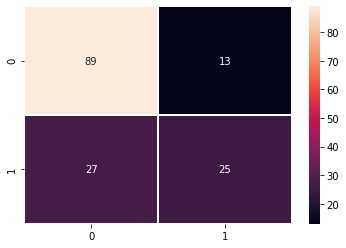

In [79]:
accuracy_list.append(rf_gscv.score(X_test,Y_test))
algorithm.append("Random Forest Classifier")
cm = confusion_matrix(Y_test,rf_gscv.predict(X_test))
predict_list.append(cm.item(0)+cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()


In [84]:
param_grid = {'n_estimators': np.arange(10, 100, 10)}
rf = RandomForestClassifier(random_state = 42)
rf_gscv = GridSearchCV(rf, param_grid, cv=4)
rf_gscv.fit(X_train, Y_train)
print('Best K Value is ',rf_gscv.best_params_)

Best K Value is  {'n_estimators': 90}


In [87]:
print('test accuracy:',rf_gscv.score(X_test,Y_test))
accuracy_list.append(rf_gscv.score(X_test,Y_test))
algorithm.append('Random Forest Classifier')

test accuracy: 0.7402597402597403


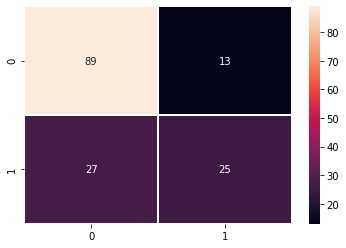

In [88]:
cm = confusion_matrix(Y_test,rf_gscv.predict(X_test))
predict_list.append(cm.item(0)+cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()


test accuracy: 0.7272727272727273


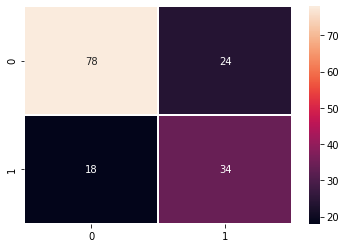

In [89]:
### Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print('test accuracy:',dt.score(X_test,Y_test))
accuracy_list.append(dt.score(X_test,Y_test))
algorithm.append('Decision Tree Classifier')
cm = confusion_matrix(Y_test,dt.predict(X_test))
predict_list.append(cm.item(0)+cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()